In [23]:
import mnist_loader
>>> training_data, validation_data, test_data = \
... mnist_loader.load_data_wrapper()

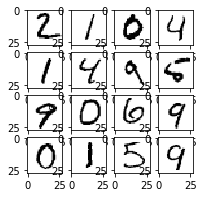

In [24]:
from matplotlib import pyplot as plt
%matplotlib inline

rows = 4
columns = 4
fig=plt.figure(figsize=(3, 3))

for i in range(1, rows*columns +1):
    pix = test_data[i][0]
    pix = pix.reshape((28,28))
    fig.add_subplot(rows, columns, i)
    plt.imshow(pix, interpolation='nearest', cmap='Greys')

plt.show()

In [38]:
import numpy as np
import random

class Network(object):
    
    def __init__(self,sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y,1) for y in sizes[1:]]
        self.weights = [np.random.randn(y,x) for x,y in zip(sizes[:-1], sizes[1:])]
        
    def feedforward(self,a):
        for b,w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w,a)+b)
        return a
    
    def SGD(self, training_data, epochs, mini_batch_size, eta,test_data=None):
        if test_data: n_test = len(test_data)
        n = len(training_data)
        for j in xrange(epochs):
            random.shuffle(training_data)
            mini_batches = [training_data[k:k+mini_batch_size] for k in xrange(0,n,mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch,eta)
            if test_data:
                print "Epoch {0}: {1} / {2}".format(j, self.evaluate(test_data), n_test)
            else:
                print "Epoch {0} complete".format(j)
            
    def update_mini_batch(self, mini_batch,eta):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        for x,y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x,y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch)*nw)for w, nw in zip(self.weights, nabla_w)]
        self.weights = [b-(eta/len(mini_batch)*nb)for b, nb in zip(self.weights, nabla_b)]
        
    def backprop(self, x, y):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]

        activation = x
        activations = [x]
        zs = [] 
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)

        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())

        for l in xrange(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)
    
    def evaluate (self, test_data):
        test_results = [(np.argmax(self.feedforward(x)), y) for (x,y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)
    
    def cost_derivative(self, output_activations, y):
        return (output_activations-y)
    
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

In [39]:
net = Network([784,30, 10])

In [40]:
net.SGD(training_data, 10, 10, 3.0, test_data=test_data)

Epoch 0: 8941 / 10000
Epoch 1: 9031 / 10000
Epoch 2: 9221 / 10000
Epoch 3: 9108 / 10000
Epoch 4: 9189 / 10000
Epoch 5: 9279 / 10000
Epoch 6: 9260 / 10000
Epoch 7: 9271 / 10000
Epoch 8: 9321 / 10000
Epoch 9: 9324 / 10000
